In [4]:
import operator
from typing import Annotated, Any
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.errors import GraphRecursionError
from IPython.display import Image, display

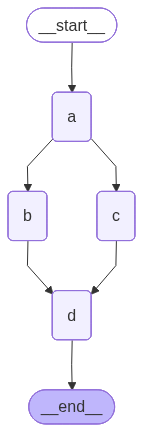

In [3]:
class State(TypedDict):
    aggregate: Annotated[list, operator.add]

def node_a(state: State):
    print(f'Adding "A" to {state["aggregate"]}')
    return {"aggregate": ["I'm A"]}

def node_b(state: State):
    print(f'Adding "B" to {state["aggregate"]}')
    return {"aggregate": ["I'm B"]}

def node_c(state: State):
    print(f'Adding "C" to {state["aggregate"]}')
    return {"aggregate": ["I'm C"]}

def node_d(state: State):
    print(f'Adding "D" to {state["aggregate"]}')
    return {"aggregate": ["I'm D"]}

builder = StateGraph(State)
builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)
builder.add_node("d", node_d)
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
try:
    graph.invoke({"aggregate": []}, {"recursion_limit": 3})
except GraphRecursionError as e:
    print(f"GraphRecursionError captured: {e}")

Adding "A" to []
Adding "B" to ["I'm A"]
Adding "C" to ["I'm A"]
Adding "D" to ["I'm A", "I'm B", "I'm C"]
